In [1]:
from pathlib import Path
import json

import pandas as pd  # pip install pandas
import numpy as np  # pip install numpy
import matplotlib.pyplot as plt  # pip install matplotlib
from scipy.stats import pearsonr  # pip install scipy
from tqdm.notebook import tqdm  # pip install tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
git_path = "/content/drive/MyDrive/Datasets/DATAR/app_related/github_metadata.json"
play_path = "/content/drive/MyDrive/Datasets/DATAR/app_related/google_play_metadata.json"

In [4]:
git_df = pd.read_json(git_path)
git_df = git_df.set_index(['github_name'])
git_df = git_df.drop(columns=['id', 'node_id', 'owner_id', 'owner_node_id', 'owner_avatar_url', 'owner_gravatar_id', 'owner_url', 'owner_type', 'owner_site_admin', 'url', 'mirror_url', 'is_template', 'web_commit_signoff_required', 'default_branch', 'permissions_admin', 'permissions_maintain', 'permissions_pull', 'permissions_push', 'permissions_triage', 'temp_clone_token', 'open_issues_count'])  # useless columns
git_df = git_df.drop(columns=['package_name'])  # will be joined with play_df
git_df = git_df.rename(columns={'name': 'repo_name', 'description': 'repo_description'})
git_df

,repo_name,private,owner_login,repo_description,fork,created_at,updated_at,pushed_at,homepage,size,...,disabled,license,allow_forking,topics,visibility,forks,open_issues,watchers,network_count,subscribers_count
github_name,,,,,,,,,,,,,,,,,,,,,
00-Evan/shattered-pixel-dungeon,shattered-pixel-dungeon,False,00-Evan,Shattered Pixel Dungeon is an open-source trad...,False,2014-07-31 21:56:31+00:00,2023-12-10 13:10:46+00:00,2023-10-26 16:41:50+00:00,https://shatteredpixel.com/shatteredpd/,152252,...,False,"{'key': 'gpl-3.0', 'name': 'GNU General Public...",True,"[android, game, game-development, ios, java, l...",public,922,7,3196,922,99
0niel/university-app,university-app,False,0niel,A mobile application for the MIREA - Russian T...,False,2021-05-11 14:37:44+00:00,2023-12-01 07:06:14+00:00,2023-12-10 10:25:53+00:00,None,24795,...,False,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[android, bloc, clean-architecture, dart, flut...",public,18,11,121,18,4
0xbad1d3a5/Kaku,Kaku,False,0xbad1d3a5,画 - Japanese OCR Dictionary,False,2016-04-11 05:24:33+00:00,2023-12-06 05:15:01+00:00,2022-07-28 00:44:27+00:00,https://kaku.fuwafuwa.ca/,48848,...,False,"{'key': 'bsd-3-clause', 'name': 'BSD 3-Clause ...",True,"[android, japanese, java, kotlin, ocr]",public,35,21,190,35,13
0xf4b1/motionmate,motionmate,False,0xf4b1,Simple and lightweight step counter app for An...,False,2019-04-04 01:35:02+00:00,2023-11-09 12:23:08+00:00,2023-12-10 21:25:08+00:00,None,386,...,False,"{'key': 'gpl-3.0', 'name': 'GNU General Public...",True,"[android, stepcounter]",public,1,0,22,1,4
1fish2/BBQTimer,BBQTimer,False,1fish2,Android lock-screen interval timer/stopwatch.,False,2014-02-15 08:11:11+00:00,2023-10-08 16:07:49+00:00,2023-10-26 04:23:13+00:00,None,51860,...,False,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[android, android-application, bbq-timer, java...",public,13,0,22,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoff99/ToxAndroidRefImpl,ToxAndroidRefImpl,False,zoff99,Tox Reference implementation for Android,False,2017-04-28 14:23:44+00:00,2023-12-09 18:33:32+00:00,2023-12-10 14:31:25+00:00,None,34844,...,False,"{'key': 'gpl-3.0', 'name': 'GNU General Public...",True,"[android, messaging, offline-messages, referen...",public,53,28,247,53,23
zoff99/tox_push_msg_app,tox_push_msg_app,False,zoff99,Tox Push Message App,False,2021-01-08 19:50:11+00:00,2023-07-31 13:18:56+00:00,2023-04-16 08:43:54+00:00,None,760,...,False,"{'key': 'gpl-3.0', 'name': 'GNU General Public...",True,"[android, chat, instant-messaging, tox]",public,2,0,8,2,2
zsmb13/MaterialDrawerKt,MaterialDrawerKt,False,zsmb13,A Kotlin DSL wrapper around the mikepenz/Mater...,False,2017-04-04 13:35:03+00:00,2023-10-14 18:36:05+00:00,2020-06-19 15:54:14+00:00,None,1352,...,False,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,"[android, android-library, android-ui, drawer,...",public,41,8,518,41,11


In [5]:
print(git_df.info())       # Check for column types and non-null values

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 00-Evan/shattered-pixel-dungeon to zxing/zxing
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   repo_name          1388 non-null   object             
 1   private            1388 non-null   bool               
 2   owner_login        1388 non-null   object             
 3   repo_description   1340 non-null   object             
 4   fork               1388 non-null   bool               
 5   created_at         1388 non-null   datetime64[ns, UTC]
 6   updated_at         1388 non-null   datetime64[ns, UTC]
 7   pushed_at          1388 non-null   datetime64[ns, UTC]
 8   homepage           585 non-null    object             
 9   size               1388 non-null   int64              
 10  stargazers_count   1388 non-null   int64              
 11  watchers_count     1388 non-null   int64              
 12  language        

In [6]:
play_df = pd.read_json(play_path)
play_df = play_df.drop('index', axis=1).set_index(['github_name'])
play_df

,package_name,category,contentRating,title,summary,description,installs,score,num_ratings,num_reviews,rate_1,rate_2,rate_3,rate_4,rate_5,developerId,released,updated,recentChanges,extracted_date
github_name,,,,,,,,,,,,,,,,,,,,
RankoR/android-smart-rate,com.g2pdev.smartrate.demo,LIBRARIES_AND_DEMO,Everyone,Smart Rate — Library Demo,Demo application for Smart Rate library,Smart rate is a library that helps you improve...,50+,0.000000,0,0,0,0,0,0,0,Go2Prize,Jan 6_ 2020,1578643420,Code improvements,11/26/2023
tejpratap46/RecyclerCalendarAndroid,com.tejpratapsingh.recyclercalendaractivity,LIBRARIES_AND_DEMO,Everyone,Recycler Calendar Android Exam,A DIY calendar generator library for android w...,Demo for RecyclerCalendarAndroid\r\n\r\nA simp...,50+,0.000000,0,0,0,0,0,0,0,TPS+Corp,Oct 28_ 2020,1603870292,Demo of RecyclerCalendarAndroid Library.,11/26/2023
AlinaStepanova/SeaBattle,com.avs.sea.battle,GAME_PUZZLE,Everyone,Sea Battle - Classic Puzzler,A tiny classic Sea Battle puzzle game. Play Ba...,"Sea Battle, is also known as Battleship, is a ...","10,000+",5.000000,512,2,0,0,0,0,512,Alina+Stepanova,Apr 19_ 2020,1640804765,User experience improvements\r\nThanks for pla...,11/26/2023
Shillos/cyirc-mobile,org.cyirc.cyirc,COMMUNICATION,Everyone,CyIRC,CyIRC - Cyprus IRC Network from the island of ...,CyIRC is an IRC network from the island of Cyp...,100+,0.000000,0,0,0,0,0,0,0,Nicholas+Kyriakides,Jan 3_ 2020,1578364879,We have managed to optimize the release to 57%...,11/26/2023
HoussemTN/Al-quran-Al-karim,com.brains404.quran,BOOKS_AND_REFERENCE,Everyone,The Noble Qur’an,The Noble Qur\xe2\x80\x99an - Hafs from Asim [...,The Noble Quran without internet connection\r\...,100+,0.000000,0,0,0,0,0,0,0,5.42E+18,Feb 13_ 2020,1581283607,\xd8\xa7\xd9\x84\xd8\xa5\xd8\xb5\xd8\xaf\xd8\x...,11/26/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZorinOS/zorin-connect-android,com.zorinos.zorin_connect,PRODUCTIVITY,Everyone,Zorin Connect,Connect your Zorin OS computer with your mobil...,Zorin Connect provides functionality to integr...,"100,000+",4.310000,1330,47,111,44,100,55,983,8.33E+18,Mar 14_ 2019,1681056026,- Run commands on your computer from the power...,11/27/2023
zulip/zulip-mobile,com.zulipmobile,COMMUNICATION,Everyone,Zulip,Organized team chat,Zulip (https://zulip.com/) helps teams of all ...,"100,000+",3.647887,517,38,80,65,50,80,240,Zulip,Sep 26_ 2017,1700518173,"* Support for @topic mentions, an upcoming Zul...",11/27/2023
XMRig-for-Android/xmrig-for-android,com.xmrigforandroid,TOOLS,Everyone,XMRig for Android,XMRig for Android devices with simple and adva...,XMRig for Android App uses android arm/x86 ver...,"50,000+",NaN,None,None,0,0,0,0,0,6.67561E+18,None,1653875205,* Set SDK min ver to 29 by @garrylachman in #1...,1/22/2024


In [7]:
print(play_df.info())       # Check for column types and non-null values

<class 'pandas.core.frame.DataFrame'>
Index: 1419 entries, RankoR/android-smart-rate to Bip-Rep/sherpa
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   package_name    1419 non-null   object 
 1   category        1419 non-null   object 
 2   contentRating   1419 non-null   object 
 3   title           1419 non-null   object 
 4   summary         1419 non-null   object 
 5   description     1419 non-null   object 
 6   installs        1419 non-null   object 
 7   score           1378 non-null   float64
 8   num_ratings     1419 non-null   object 
 9   num_reviews     1419 non-null   object 
 10  rate_1          1419 non-null   int64  
 11  rate_2          1419 non-null   int64  
 12  rate_3          1419 non-null   int64  
 13  rate_4          1419 non-null   int64  
 14  rate_5          1419 non-null   int64  
 15  developerId     1419 non-null   object 
 16  released        1328 non-null   object 
 17  upda

In [8]:
df = play_df.join(git_df)
df

,package_name,category,contentRating,title,summary,description,installs,score,num_ratings,num_reviews,...,disabled,license,allow_forking,topics,visibility,forks,open_issues,watchers,network_count,subscribers_count
github_name,,,,,,,,,,,,,,,,,,,,,
RankoR/android-smart-rate,com.g2pdev.smartrate.demo,LIBRARIES_AND_DEMO,Everyone,Smart Rate — Library Demo,Demo application for Smart Rate library,Smart rate is a library that helps you improve...,50+,0.000000,0,0,...,False,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,"[android, clean-architecture, dagger2, kotlin,...",public,4,0,20,4,2
tejpratap46/RecyclerCalendarAndroid,com.tejpratapsingh.recyclercalendaractivity,LIBRARIES_AND_DEMO,Everyone,Recycler Calendar Android Exam,A DIY calendar generator library for android w...,Demo for RecyclerCalendarAndroid\r\n\r\nA simp...,50+,0.000000,0,0,...,False,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[android, android-library, android-ui, calenda...",public,10,0,109,10,5
AlinaStepanova/SeaBattle,com.avs.sea.battle,GAME_PUZZLE,Everyone,Sea Battle - Classic Puzzler,A tiny classic Sea Battle puzzle game. Play Ba...,"Sea Battle, is also known as Battleship, is a ...","10,000+",5.000000,512,2,...,False,None,True,"['2d-game', '2d-graphics', 'android', 'battles...",public,1,0,10,1,2
Shillos/cyirc-mobile,org.cyirc.cyirc,COMMUNICATION,Everyone,CyIRC,CyIRC - Cyprus IRC Network from the island of ...,CyIRC is an IRC network from the island of Cyp...,100+,0.000000,0,0,...,False,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,"[android, android-app, java, webview, webview-...",public,2,0,2,2,3
HoussemTN/Al-quran-Al-karim,com.brains404.quran,BOOKS_AND_REFERENCE,Everyone,The Noble Qur’an,The Noble Qur\xe2\x80\x99an - Hafs from Asim [...,The Noble Quran without internet connection\r\...,100+,0.000000,0,0,...,False,None,True,"['android', 'application', 'flutter', 'quran',...",public,37,1,107,37,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZorinOS/zorin-connect-android,com.zorinos.zorin_connect,PRODUCTIVITY,Everyone,Zorin Connect,Connect your Zorin OS computer with your mobil...,Zorin Connect provides functionality to integr...,"100,000+",4.310000,1330,47,...,False,"{'key': 'gpl-2.0', 'name': 'GNU General Public...",True,[],public,16,12,179,16,17
zulip/zulip-mobile,com.zulipmobile,COMMUNICATION,Everyone,Zulip,Organized team chat,Zulip (https://zulip.com/) helps teams of all ...,"100,000+",3.647887,517,38,...,False,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,"[android, ios, react-native]",public,628,734,1209,628,34
XMRig-for-Android/xmrig-for-android,com.xmrigforandroid,TOOLS,Everyone,XMRig for Android,XMRig for Android devices with simple and adva...,XMRig for Android App uses android arm/x86 ver...,"50,000+",NaN,None,None,...,False,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[android, crypto, java, kotlin, monero, python]",public,26,16,114,39,7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1419 entries, RankoR/android-smart-rate to Bip-Rep/sherpa
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   package_name       1419 non-null   object             
 1   category           1419 non-null   object             
 2   contentRating      1419 non-null   object             
 3   title              1419 non-null   object             
 4   summary            1419 non-null   object             
 5   description        1419 non-null   object             
 6   installs           1419 non-null   object             
 7   score              1378 non-null   float64            
 8   num_ratings        1419 non-null   object             
 9   num_reviews        1419 non-null   object             
 10  rate_1             1419 non-null   int64              
 11  rate_2             1419 non-null   int64              
 12  rate_3             

In [10]:
from pathlib import Path
import json
from tqdm import tqdm
import difflib

# Directory containing all JSON files
jsons_path_root = Path('/content/drive/MyDrive/Datasets/DATAR/release_related/all_jsons')

# Dictionary to store detailed data per app
app_releases_data = {}

# Function to find the closest matching key
def find_closest_key(target, available_keys, cutoff=0.8):
    matches = difflib.get_close_matches(target, available_keys, n=1, cutoff=cutoff)
    return matches[0] if matches else None

# Iterate over JSON files
for path in tqdm(jsons_path_root.iterdir(), desc="Processing apps"):
    # Get the app name from the file name
    app_name = path.stem.replace('-_-', '/')

    app_releases_data[app_name] = {}

    try:
        # Load JSON file
        with open(path) as file:
            releases = json.load(file)
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON for {app_name}: {e}")
        continue

    # Iterate over releases
    for release in releases:
        # Extract release_id from release_data
        release_data_dict = release.get('release_data', {})
        release_id = release_data_dict.get('id', f"unknown_release_{len(app_releases_data[app_name]) + 1}")

        # Extract code_metrics and check for CognitiveComplexity
        code_metrics = release.get('code_metrics', {})
        if 'CognitiveComplexity' not in code_metrics:
            continue  # Skip this release if CognitiveComplexity is not available

        # Retrieve metrics
        cognitive_complexity = code_metrics['CognitiveComplexity']
        issues_solved = len(release.get('closed_issues', []))
        # Initialize a set to store unique contributor IDs for this release
        contributors = set()

        # Iterate over the list of contributors in the release, if present
        for contributor in release.get('contributors', []):
            contributors.add(contributor.get('id'))  # Add the contributor ID to the set

        # Convert the set to a list (to ensure JSON compatibility)
        contributors_list = list(contributors)

        # Store data for this release
        app_releases_data[app_name][release_id] = {
            'cognitive_complexity': cognitive_complexity,
            'issues_solved': issues_solved,
            'contributors': contributors_list  # Store the list of contributor IDs
        }

# Save results to a JSON file
with open('app_releases_with_cognitive_complexity.json', 'w') as outfile:
    json.dump(app_releases_data, outfile, indent=4)

# Print a summary of results
for app, releases in app_releases_data.items():
    print(f"App: {app}, Number of Releases: {len(releases)}")


Processing apps: 1363it [03:31,  6.45it/s]


App: joaomneto/TitanCompanion, Number of Releases: 1
App: syphon-org/syphon, Number of Releases: 19
App: easytarget2000/micopi-android-matthew, Number of Releases: 0
App: jroal/a2dpvolume, Number of Releases: 1
App: sangcomz/FishBun, Number of Releases: 0
App: jquesnelle/nds4droid, Number of Releases: 1
App: penguin86/nextcloud-maps-client, Number of Releases: 0
App: developerfromjokela/motioneye-client, Number of Releases: 1
App: sunilpaulmathew/sNotz, Number of Releases: 8
App: TychoTheTaco/Prime-Number-Finder, Number of Releases: 1
App: imgly/pesdk-android-demo, Number of Releases: 0
App: amrabed/IqamaTimes, Number of Releases: 0
App: sangcomz/StickyTimeLine, Number of Releases: 0
App: garmax1/material-flashlight, Number of Releases: 0
App: astubenbord/paperless-mobile, Number of Releases: 0
App: MovingBlocks/DestinationSol, Number of Releases: 3
App: Spikatrix/LRC-Editor, Number of Releases: 7
App: equeim/tremotesf-android, Number of Releases: 0
App: david-read-iii/The-Guardian-New

In [11]:
# Remove apps with 0 releases
app_releases_data = {app: releases for app, releases in app_releases_data.items() if releases}

print(f"Number of apps with releases: {len(app_releases_data)}")

Number of apps with releases: 616


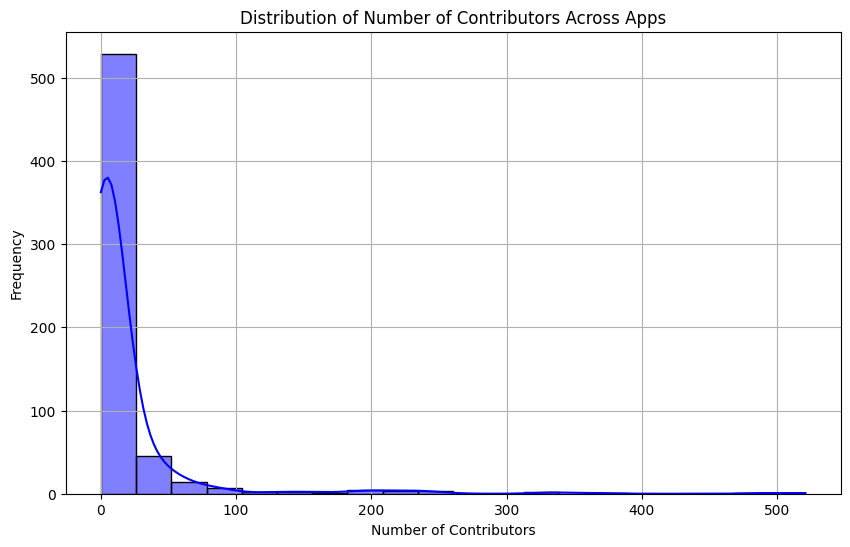

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for visualization
app_names = list(app_releases_data.keys())
contributor_counts = []

for app, releases in app_releases_data.items():
    # Collect all contributor IDs across all releases for this app
    all_contributors = set()  # Use a set to ensure uniqueness
    for release_data in releases.values():
        all_contributors.update(release_data.get('contributors', []))  # Add contributor IDs from this release
    contributor_counts.append(len(all_contributors))  # Count unique contributors for this app

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(contributor_counts, bins=20, kde=True, color='blue')
plt.xlabel('Number of Contributors')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Contributors Across Apps')
plt.grid()
plt.show()

<ipython-input-13-07888bdc3a05>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Contributors', y='App Name', data=df_contributors.head(10), palette='viridis')


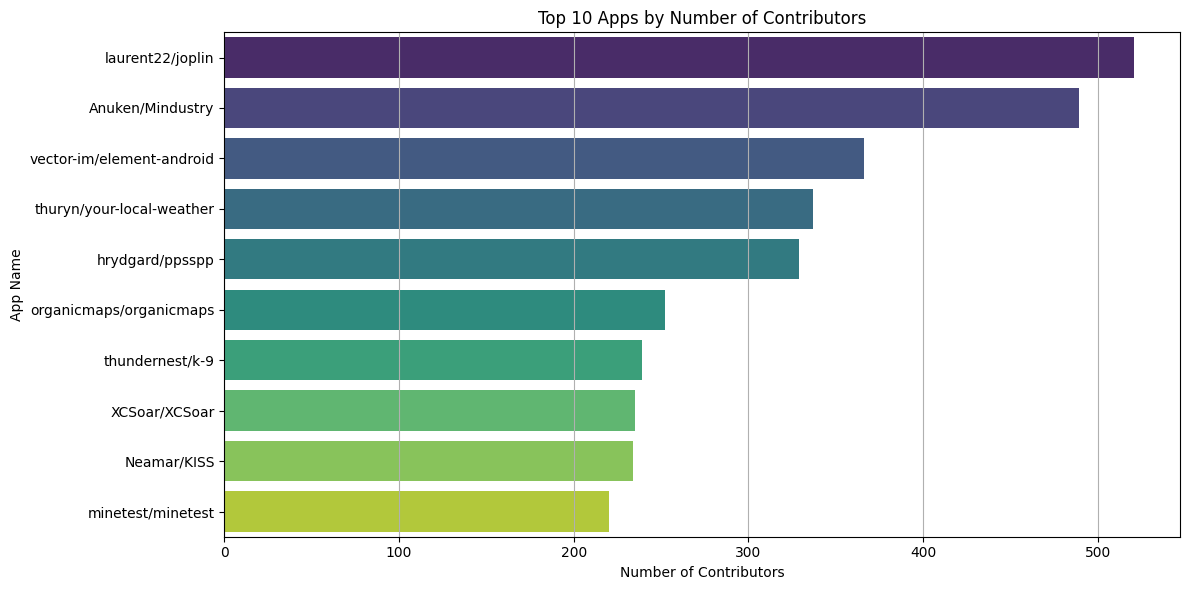

In [13]:
import pandas as pd

# Create a DataFrame for easier manipulation
df_contributors = pd.DataFrame({
    'App Name': app_names,
    'Number of Contributors': contributor_counts
}).sort_values(by='Number of Contributors', ascending=False)

# Plot top 10 apps
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Contributors', y='App Name', data=df_contributors.head(10), palette='viridis')
plt.xlabel('Number of Contributors')
plt.ylabel('App Name')
plt.title('Top 10 Apps by Number of Contributors')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Flatten app_releases_data into a DataFrame
release_data = []
for app, releases in app_releases_data.items():
    for release_id, release_info in releases.items():
        release_data.append({
            'app': app,
            'release_id': release_id,
            'contributors': release_info['contributors'],
            'nr_contributors': len(release_info['contributors']),
            'cognitive_complexity': release_info['cognitive_complexity'],
            'issues_solved': release_info['issues_solved']
        })

# Create a DataFrame
df_releases = pd.DataFrame(release_data)


In [15]:
# Extract the score into a new column
df_releases['cognitive_complexity_score'] = df_releases['cognitive_complexity'].apply(lambda x: x['score'])

In [16]:
df_releases.head()

,app,release_id,contributors,nr_contributors,cognitive_complexity,issues_solved,cognitive_complexity_score
0,joaomneto/TitanCompanion,21143146,"[172649, 5557570, 19646549]",3,"{'count': 13, 'score': 407}",125,407
1,syphon-org/syphon,63813866,"[13156001, 34414563, 20861699, 47475676, 54689...",6,"{'count': 1, 'score': 24}",10,24
2,syphon-org/syphon,62520511,"[13156001, 35456194, 20861699, 34414563, 71537...",11,"{'count': 1, 'score': 24}",34,24
3,syphon-org/syphon,60518591,"[20861699, 34414563, 45366162, 1299322, 474756...",6,"{'count': 1, 'score': 24}",10,24
4,syphon-org/syphon,60181681,"[76632257, 35456194, 20861699, 34414563, 13156...",10,"{'count': 1, 'score': 24}",47,24


In [17]:
import pandas as pd

# Group by app and check variability in cognitive_complexity_score
variability_check = df_releases.groupby('app')['cognitive_complexity_score'].nunique()

# Filter apps where cognitive_complexity_score does not change
static_apps = variability_check[variability_check == 1].index.tolist()

# Filter for apps where cognitive_complexity_score is variable
variable_apps = variability_check[variability_check > 1].index

# Filter the DataFrame for these apps
variable_apps_data = df_releases[df_releases['app'].isin(variable_apps)]

# Sort by app and release_id for better readability
variable_apps_data = variable_apps_data.sort_values(by=['app', 'release_id'])

# # Display the cognitive_complexity_score changes for each variable app
# for app, group in variable_apps_data.groupby('app'):
#     print(f"App: {app}")
#     print(group[['release_id', 'cognitive_complexity_score']])
#     print("-" * 40)


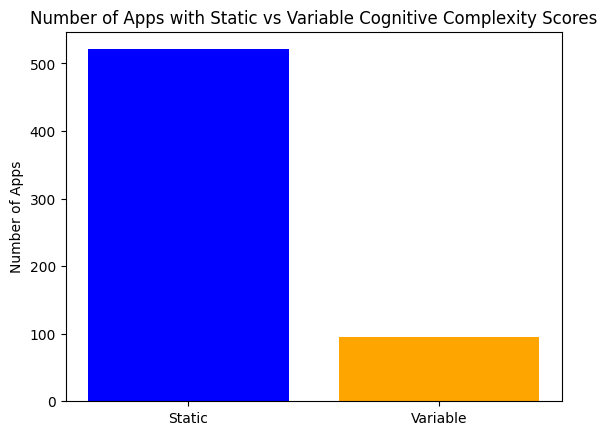

In [18]:
import matplotlib.pyplot as plt

# Count static and variable apps
counts = [len(static_apps), len(variable_apps)]
labels = ['Static', 'Variable']

# Plot the results
plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Number of Apps with Static vs Variable Cognitive Complexity Scores')
plt.ylabel('Number of Apps')
plt.show()


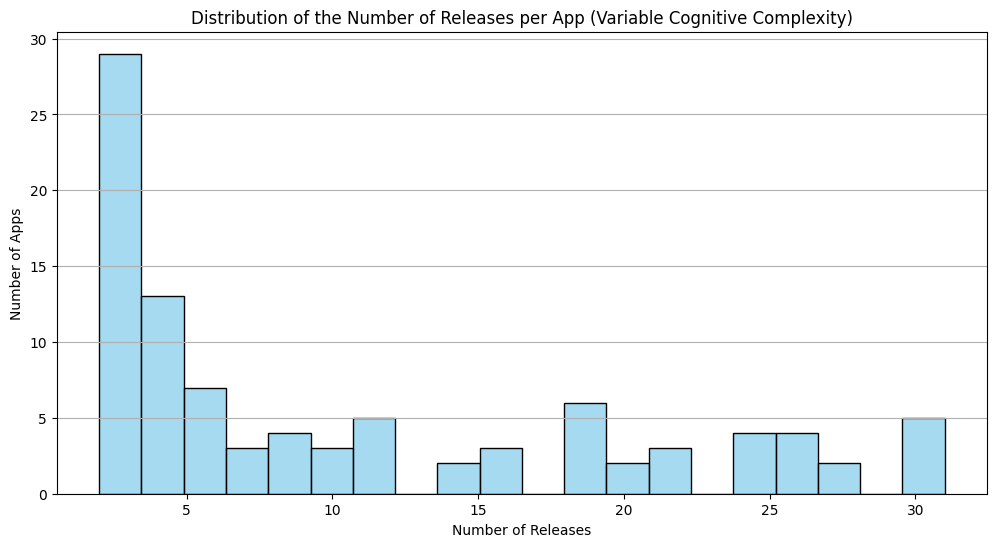

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of releases per app for variable apps
release_counts = variable_apps_data.groupby('app')['release_id'].count()

# Plot the distribution of the number of releases per app
plt.figure(figsize=(12, 6))
sns.histplot(release_counts, bins=20, kde=False, color='skyblue')
plt.title('Distribution of the Number of Releases per App (Variable Cognitive Complexity)')
plt.xlabel('Number of Releases')
plt.ylabel('Number of Apps')
plt.grid(axis='y')
plt.show()


In [20]:
# Filter df_releases for these apps
filtered_df = df_releases[df_releases['app'].isin(variable_apps)]

In [21]:
# Check if there are rows where the number of contributors is 0
contributors_zero_count = filtered_df[filtered_df['nr_contributors'] == 0].shape[0]

contributors_zero_count



34

In [22]:
# Filter out rows where the number of contributors is 0
filtered_df = filtered_df[filtered_df['nr_contributors'] != 0]

In [23]:
len(filtered_df)

974

In [24]:
len(variable_apps)

95

In [25]:
filtered_df.head()

,app,release_id,contributors,nr_contributors,cognitive_complexity,issues_solved,cognitive_complexity_score
23,sunilpaulmathew/sNotz,87127941,[15515387],1,"{'count': 19, 'score': 721}",0,721
24,sunilpaulmathew/sNotz,85776440,[15515387],1,"{'count': 18, 'score': 700}",1,700
25,sunilpaulmathew/sNotz,65107571,[15515387],1,"{'count': 16, 'score': 651}",3,651
26,sunilpaulmathew/sNotz,62845047,[15515387],1,"{'count': 16, 'score': 651}",2,651
27,sunilpaulmathew/sNotz,58249509,[15515387],1,"{'count': 15, 'score': 616}",1,616


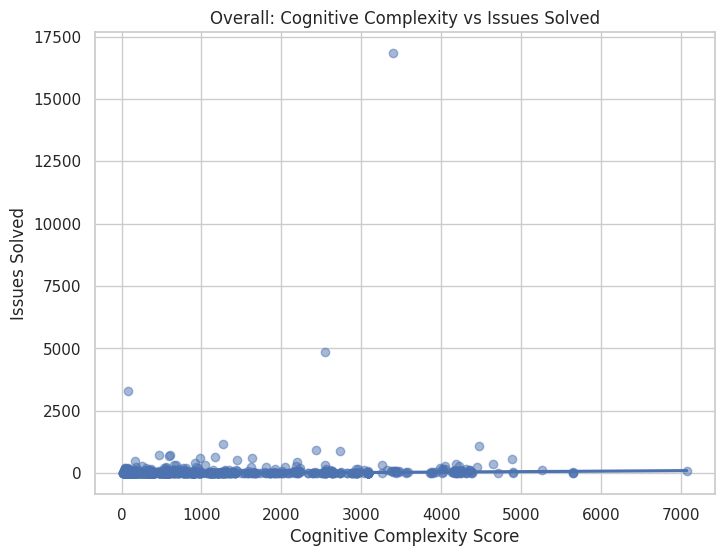

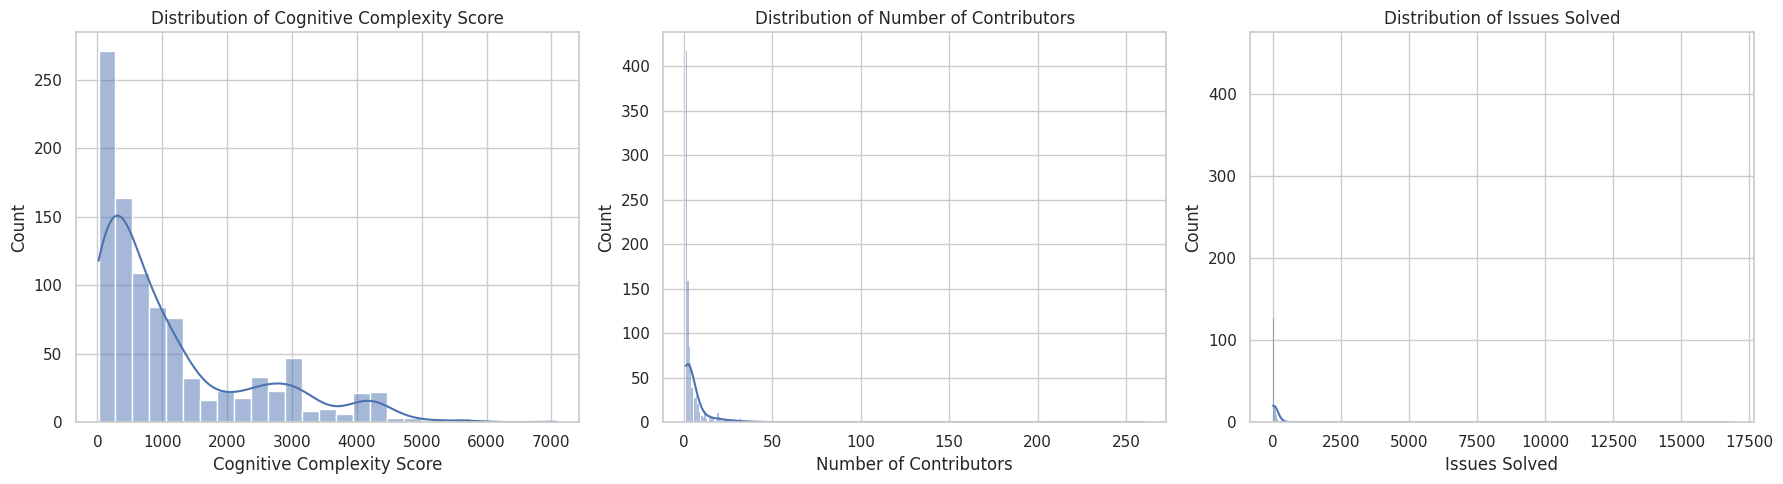

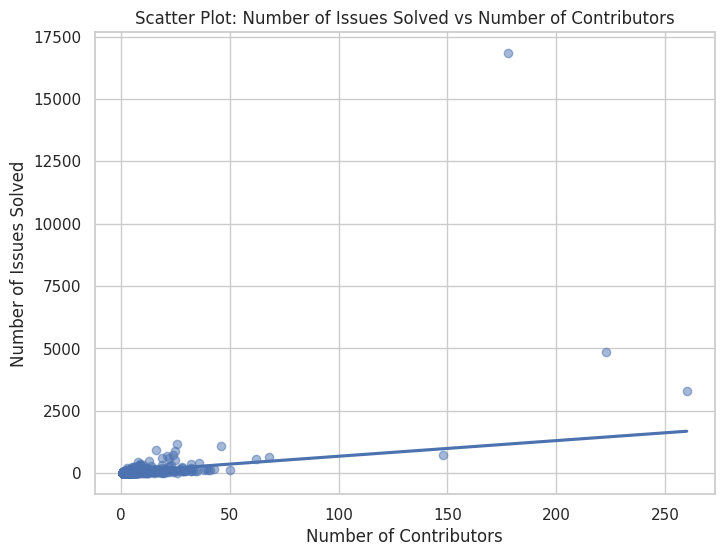

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots use a nice style
sns.set(style="whitegrid")

# -------------------------------
# 1. Overall Relationship with LOESS
# -------------------------------

plt.figure(figsize=(8, 6))
sns.regplot(
    x="cognitive_complexity_score",
    y="issues_solved",
    data=filtered_df,
    lowess=True,         # enables LOESS smoothing
    scatter_kws={'alpha': 0.5}  # makes scatter points semi-transparent
)
plt.title("Overall: Cognitive Complexity vs Issues Solved")
plt.xlabel("Cognitive Complexity Score")
plt.ylabel("Issues Solved")
plt.show()


# -------------------------------
# 3. Assessing Distributions of the Variables
# -------------------------------

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of cognitive_complexity_score
sns.histplot(filtered_df['cognitive_complexity_score'], kde=True, ax=axs[0])
axs[0].set_title("Distribution of Cognitive Complexity Score")
axs[0].set_xlabel("Cognitive Complexity Score")

# Distribution of nr_contributors (Team Size)
sns.histplot(filtered_df['nr_contributors'], kde=True, ax=axs[1])
axs[1].set_title("Distribution of Number of Contributors")
axs[1].set_xlabel("Number of Contributors")

# Distribution of issues_solved
sns.histplot(filtered_df['issues_solved'], kde=True, ax=axs[2])
axs[2].set_title("Distribution of Issues Solved")
axs[2].set_xlabel("Issues Solved")

plt.tight_layout()
plt.show()

# Set the style for the plots
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.regplot(
    x="nr_contributors",
    y="issues_solved",
    data=filtered_df,
    lowess=True,           # Adds a LOESS smoother to capture potential non-linear patterns
    scatter_kws={'alpha': 0.5}  # Makes the scatter points semi-transparent
)
plt.xlabel("Number of Contributors")
plt.ylabel("Number of Issues Solved")
plt.title("Scatter Plot: Number of Issues Solved vs Number of Contributors")
plt.show()


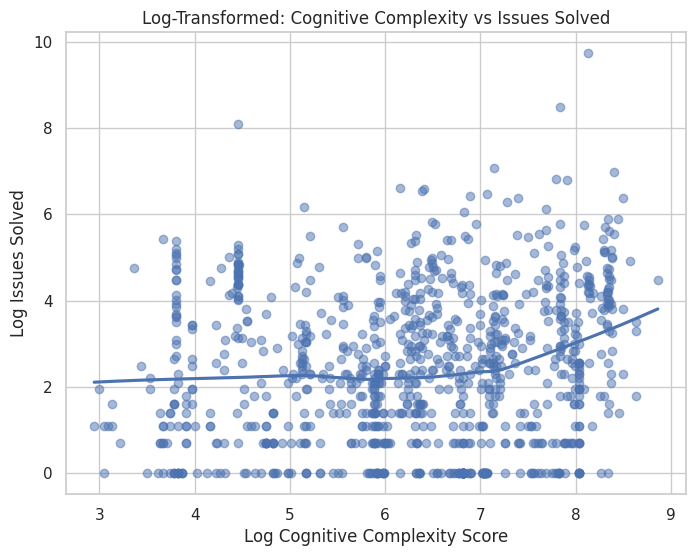

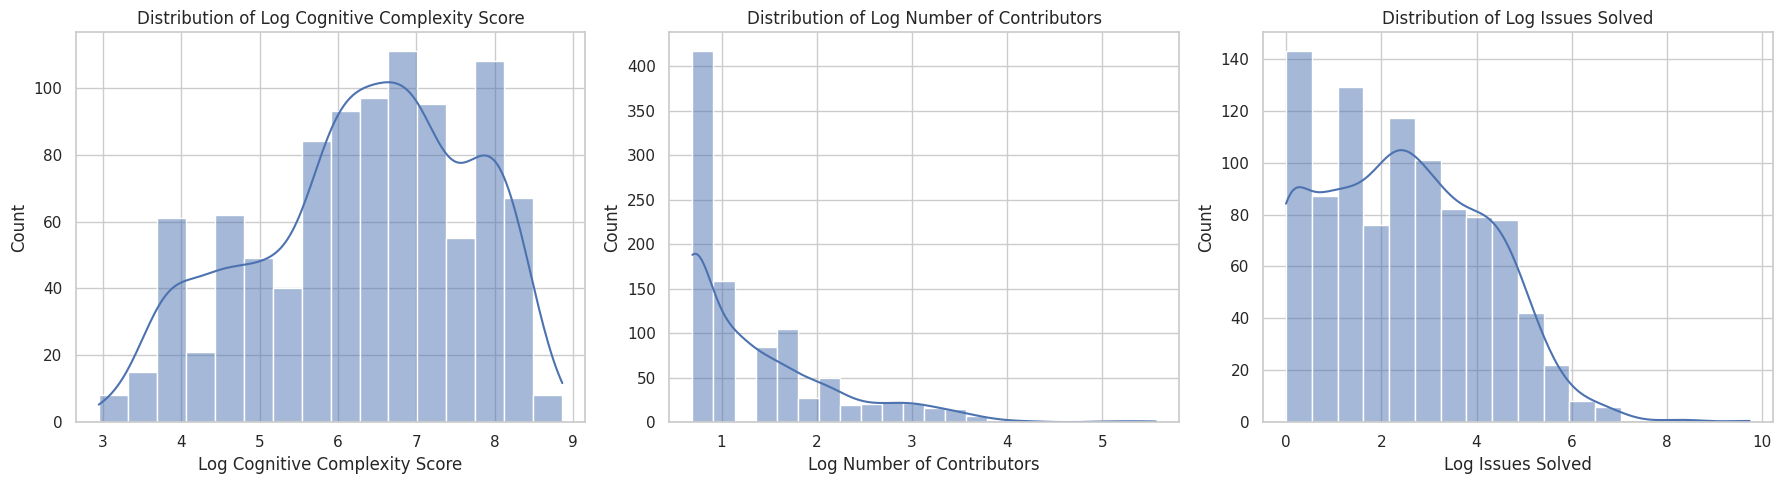

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create log-transformed columns, adding 1 to avoid issues with log(0)
filtered_df['log_issues_solved'] = np.log(filtered_df['issues_solved'] + 1)
filtered_df['log_cognitive_complexity'] = np.log(filtered_df['cognitive_complexity_score'] + 1)
filtered_df['log_nr_contributors'] = np.log(filtered_df['nr_contributors'] + 1)

# Plot the relationship using the log-transformed variables
plt.figure(figsize=(8, 6))
sns.regplot(
    x="log_cognitive_complexity",
    y="log_issues_solved",
    data=filtered_df,
    lowess=True,         # LOESS smoothing
    scatter_kws={'alpha': 0.5}
)
plt.title("Log-Transformed: Cognitive Complexity vs Issues Solved")
plt.xlabel("Log Cognitive Complexity Score")
plt.ylabel("Log Issues Solved")
plt.show()

# Check the distribution of the log-transformed variables
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(filtered_df['log_cognitive_complexity'], kde=True, ax=axs[0])
axs[0].set_title("Distribution of Log Cognitive Complexity Score")
axs[0].set_xlabel("Log Cognitive Complexity Score")

sns.histplot(filtered_df['log_nr_contributors'], kde=True, ax=axs[1])
axs[1].set_title("Distribution of Log Number of Contributors")
axs[1].set_xlabel("Log Number of Contributors")

sns.histplot(filtered_df['log_issues_solved'], kde=True, ax=axs[2])
axs[2].set_title("Distribution of Log Issues Solved")
axs[2].set_xlabel("Log Issues Solved")

plt.tight_layout()
plt.show()



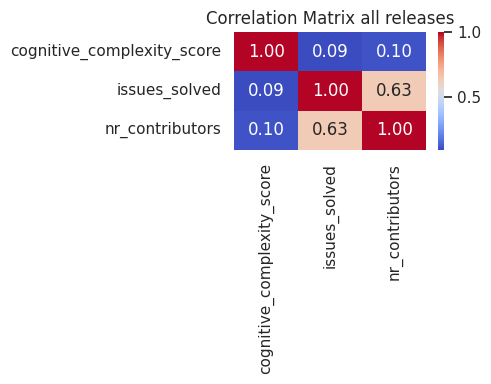

In [29]:
# Let's do a naive correlation for demonstration
corr_matrix = filtered_df[['cognitive_complexity_score', 'issues_solved', 'nr_contributors']].corr()

# Correlation Plot
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title(f"Correlation Matrix all releases")
plt.tight_layout()
plt.show()  # Show the plot directly instead of saving it


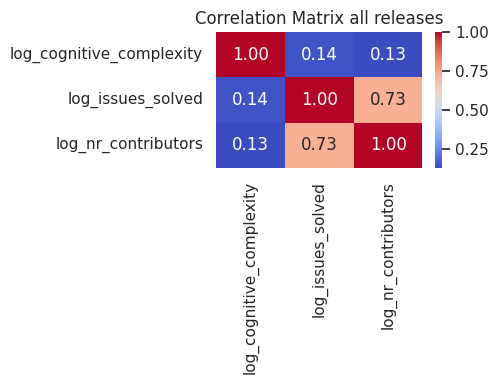

In [30]:
# Let's do a naive correlation for demonstration
corr_matrix = filtered_df[['log_cognitive_complexity', 'log_issues_solved', 'log_nr_contributors']].corr()

# Correlation Plot
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title(f"Correlation Matrix all releases")
plt.tight_layout()
plt.show()  # Show the plot directly instead of saving it


In [31]:
import statsmodels.formula.api as smf
# resolved_issues_count ~ cyclomatic_complexity + cognitive_complexity + team_size
df_model = filtered_df
model = smf.ols(formula="log_issues_solved ~ log_cognitive_complexity + log_nr_contributors", data=df_model)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      log_issues_solved   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     559.3
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.51e-162
Time:                        14:05:52   Log-Likelihood:                -1539.4
No. Observations:                 974   AIC:                             3085.
Df Residuals:                     971   BIC:                             3099.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

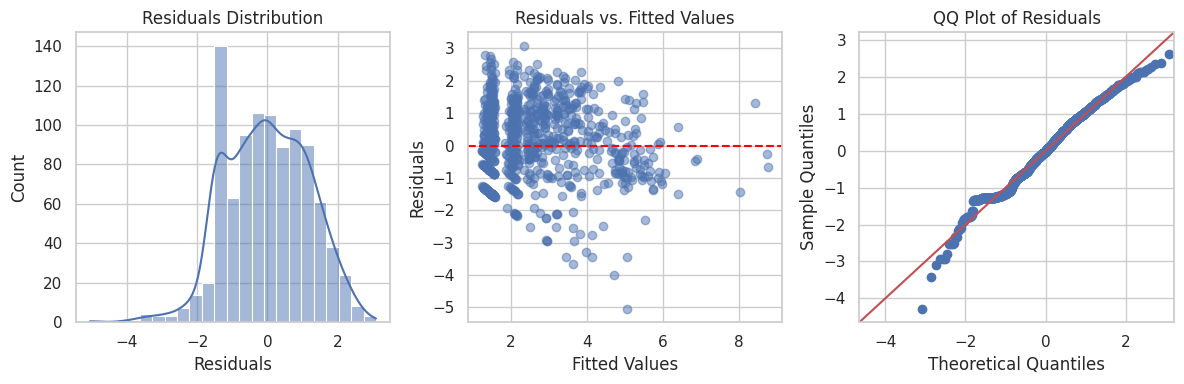

In [32]:
import statsmodels.api as sm

# Get residuals and fitted values from the RESULTS object (not the model)
residuals = results.resid          # <-- FIX: use results.resid
fitted_values = results.fittedvalues  # <-- FIX: use results.fittedvalues


# 1. Residuals Histogram (Normality check)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")

# 2. Residuals vs. Fitted values (Homoscedasticity check)
plt.subplot(1, 3, 2)
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# 3. QQ Plot (Normality check)
plt.subplot(1, 3, 3)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = results.model.exog_names[1:]  # Exclude 'Intercept'
vif_data["VIF"] = [variance_inflation_factor(results.model.exog, i)
                   for i in range(1, results.model.exog.shape[1])]  # Skip intercept (index 0)

print(vif_data)

                   Variable       VIF
0  log_cognitive_complexity  1.016958
1       log_nr_contributors  1.016958
